<a href="https://colab.research.google.com/github/tejaswini8213/Perception-Lab/blob/main/Fourier_transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from PIL import Image
import math
import matplotlib.pyplot as plt

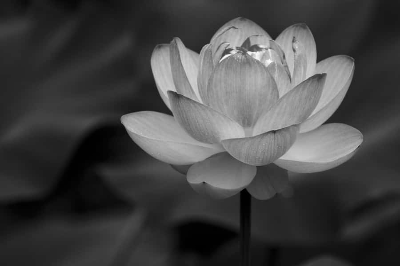

In [13]:
img = cv2.imread('image.jpg')
img_grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY )
(h, w) = img_grayscale.shape[:2]
new_width = 400
aspect_ratio = h / w
new_height = int(new_width * aspect_ratio)
img = cv2.resize(img_grayscale, (new_width, new_height))
cv2_imshow(img)

Original Image:


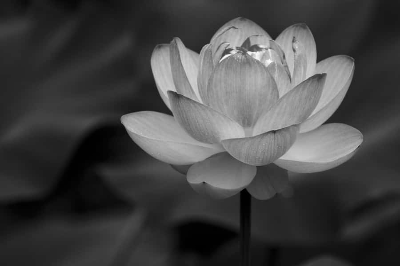

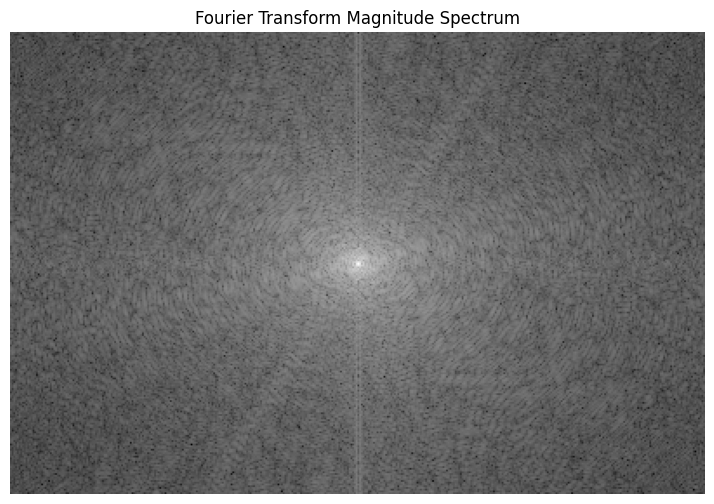

In [16]:
if img is None:
    raise ValueError("Image not found or unable to load. Ensure the image is uploaded to Colab.")

# Perform the Discrete Fourier Transform (DFT)
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)  # Shift the zero frequency component to the center

# Compute the magnitude spectrum
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

# Display the original image using cv2_imshow
print("Original Image:")
cv2_imshow(img)

# Display the Fourier Transform Magnitude Spectrum using matplotlib
plt.figure(figsize=(12, 6))
plt.title('Fourier Transform Magnitude Spectrum')
plt.imshow(magnitude_spectrum, cmap='gray')
plt.axis('off')
plt.show()

Sharpening with Fourier

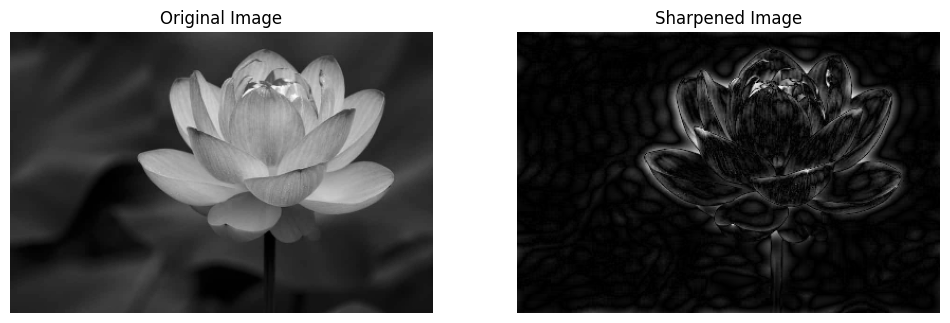

In [17]:
if img is None:
    raise ValueError("Image not found or unable to load. Ensure the image is uploaded to Colab.")

# Function to perform Fourier Transform and high-pass filtering
def high_pass_filter(img, cutoff_frequency=0.05):  # Reduced cutoff frequency
    # Convert image to float32
    image_float = np.float32(img)

    # Perform the Fourier Transform
    dft = cv2.dft(image_float, flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)

    # Create a mask for high-pass filtering
    rows, cols = img.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.ones((rows, cols, 2), np.float32)

    # Create a high-pass filter mask
    r = int(cutoff_frequency * min(rows, cols))  # Cutoff radius
    for i in range(rows):
        for j in range(cols):
            if np.sqrt((i - crow) ** 2 + (j - ccol) ** 2) < r:
                mask[i, j] = 0

    # Apply mask to the shifted DFT
    fshift = dft_shift * mask

    # Inverse DFT
    f_ishift = np.fft.ifftshift(fshift)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

    # Normalize to range 0-255
    img_back = cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX)
    img_back = np.uint8(img_back)
    return img_back

# Apply high-pass filter to the image
sharp_image = high_pass_filter(img, cutoff_frequency=0.05)  # Adjusted cutoff frequency

# Display the original and sharpened images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Sharpened Image')
plt.imshow(sharp_image, cmap='gray')
plt.axis('off')

plt.show()
